In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/wine.csv')

In [3]:
data['taster_name'].nunique()

19

In [4]:
data['price'].max()

3300.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [6]:
dupl_columns = list(data.columns)

mask = data.duplicated(subset=dupl_columns)
sber_duplicates = data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 9983


In [7]:
new_data = data.drop_duplicates(subset=dupl_columns)

In [8]:
cols_null_percent = new_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

In [9]:
thresh = new_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
new_data = new_data.dropna(thresh=thresh, axis=1)

In [10]:
cols_null_percent = new_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
country                   0.049172
province                  0.049172
variety                   0.000833
dtype: float64

In [11]:
# обрабатываем пропуски в категориальных признаках самым простым вариантом, замена на unknown

new_data['designation'] = new_data['designation'].fillna('unknown')
new_data['region_1'] = new_data['region_1'].fillna('unknown')
new_data['taster_name'] = new_data['taster_name'].fillna('unknown')
new_data['taster_twitter_handle'] = new_data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
new_data['country'] = new_data['country'].fillna('US')
new_data['price'] = new_data['price'].fillna(new_data['price'].mean())
new_data['province'] = new_data['province'].fillna('California')
new_data['variety'] = new_data['variety'].fillna('Pinot Noir')

<Axes: >

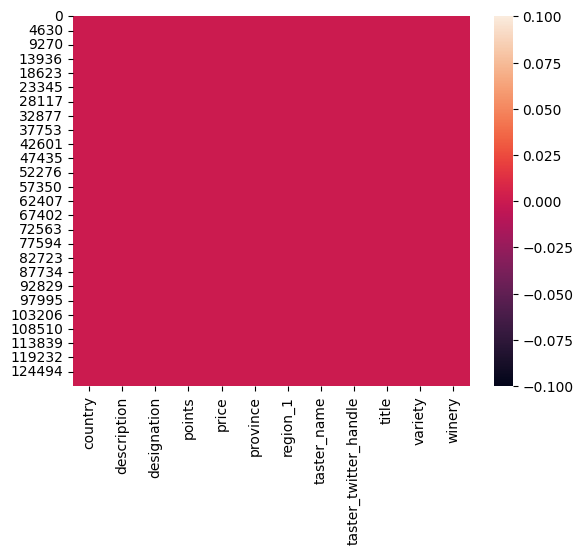

In [12]:
import seaborn as sns
sns.heatmap(new_data.isnull())

In [13]:
df = new_data.to_csv('wine_cleared.csv', index=False)